# Time Series Deep Learning Prediction
## 1. Problem statement
How to predict average price of avacado in the second day in one region 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
%matplotlib inline

In [2]:
df = pd.read_csv("data\\avocado.csv")
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [3]:
df.shape

(18249, 14)

In [4]:
df.groupby(["region", "Date"]).sum().sort_values("Total Volume", ascending=False).head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\1307173240.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["region", "Date"]).sum().sort_values("Total Volume", ascending=False).head()


Unnamed: 0  AveragePrice  Total Volume         4046  \
region  Date                                                              
TotalUS 2018-02-04          14          2.40   63890329.93  21738103.42   
        2017-02-05          94          2.13   62050078.13  22879716.56   
        2016-02-07          92          2.20   53047492.99  16674982.57   
        2017-05-07          68          2.66   48688047.83  17249373.58   
        2016-05-08          66          2.12   47462470.48  14355530.26   

                           4225        4770   Total Bags   Small Bags  \
region  Date                                                            
TotalUS 2018-02-04  20733225.64  1068533.74  20350219.21  14159282.54   
        2017-02-05  20642172.81  1666621.87  16861566.89  12909860.90   
        2016-02-07  20761386.15  2554467.86  13056656.41   9293892.71   
        2017-05-07  13935390.77   867633.21  16635650.27  11717505.60   
        2016-05-08  18340168.91  2020411.14  12746360.17   9067174.33   

                    Large Bags  XLarge Bags  year  
region  Date                                       
TotalUS 2018-02-04  5920975.30    269961.37  4036  
        2017-02-05  3838836.03    112869.96  4034  
        2016-02-07  3521102.22    241661.48  4032  
        2017-05-07  4665729.18    252415.49  4034  
        2016-05-08  3558535.75    120650.09  4032

## 2. Data Preprocessing

In [5]:
df1 = df[df['region'] == "TotalUS"]
df1 = df1[df1['type'] == "conventional"]
df1 = df1.sort_values("Date")

In [6]:
df1.shape

(169, 14)

In [7]:
df1.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2703,51,2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,TotalUS
2702,50,2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,TotalUS


In [8]:
df1.tail(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9091,1,2018-03-18,1.05,41386314.12,13707389.51,11061051.69,645380.85,15972492.07,11712807.19,3988101.74,271583.14,conventional,2018,TotalUS
9090,0,2018-03-25,1.03,43409835.75,14130799.10,12125711.42,758801.12,16394524.11,12540327.19,3544729.39,309467.53,conventional,2018,TotalUS


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 2703 to 9090
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    169 non-null    int64  
 1   Date          169 non-null    object 
 2   AveragePrice  169 non-null    float64
 3   Total Volume  169 non-null    float64
 4   4046          169 non-null    float64
 5   4225          169 non-null    float64
 6   4770          169 non-null    float64
 7   Total Bags    169 non-null    float64
 8   Small Bags    169 non-null    float64
 9   Large Bags    169 non-null    float64
 10  XLarge Bags   169 non-null    float64
 11  type          169 non-null    object 
 12  year          169 non-null    int64  
 13  region        169 non-null    object 
dtypes: float64(9), int64(2), object(3)
memory usage: 19.8+ KB


In [10]:
# Drop unneccessary data columns
df1 = df1.drop("Unnamed: 0", axis=1)
df1["Date"] = pd.to_datetime(df1["Date"], format='%Y.%m.%d')
df1 = df1.drop("type", axis=1)
df1 = df1.drop("region", axis=1)

In [11]:
df1 = df1.drop("year", axis=1)

In [12]:
df1.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

In [13]:
date_range = pd.date_range(start=df1["Date"].min(), end=df1["Date"].max(), freq='D')
i = 0
for each in date_range:
    if i>3:
        break
    i += 1
    print(each)

2015-01-04 00:00:00
2015-01-05 00:00:00
2015-01-06 00:00:00
2015-01-07 00:00:00


In [14]:
df1["Date"] = pd.to_datetime(df1["Date"], format='%Y.%m.%d')

In [15]:
date_range[0] == df1["Date"].iloc[0]

True

In [16]:
df1.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

In [17]:
stack = []
found = 0
n = 0

data = pd.DataFrame(columns = df1.columns)
for each in date_range:
    if each == df1["Date"].iloc[n]:
        data = data.append(df1.iloc[n], ignore_index=True)
        n+=1       
    else:
        temp = {
            'Date':each,
            'AveragePrice': (df1['AveragePrice'].iloc[n-1] + df1['AveragePrice'].iloc[n])/2,
            'Total Volume': (df1['Total Volume'].iloc[n-1] + df1['Total Volume'].iloc[n])/2,
            '4046':(df1['4046'].iloc[n-1] + df1['4046'].iloc[n])/2,
            '4225':(df1['4225'].iloc[n-1] + df1['4225'].iloc[n])/2,
            '4770':(df1['4770'].iloc[n-1] + df1['4770'].iloc[n])/2,
            'Total Bags':(df1['Total Bags'].iloc[n-1] + df1['Total Bags'].iloc[n])/2,
            'Small Bags':(df1['Small Bags'].iloc[n-1] + df1['Small Bags'].iloc[n])/2,
            'Large Bags':(df1['Large Bags'].iloc[n-1] + df1['Large Bags'].iloc[n])/2,
            'XLarge Bags':(df1['XLarge Bags'].iloc[n-1] + df1['XLarge Bags'].iloc[n])/2
        }
        data = data.append(pd.Series(temp), ignore_index=True)
print(temp)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df1.iloc[n], ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series

C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df1.iloc[n], ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series

C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df1.iloc[n], ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series

C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.S

C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.S

C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.S

C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.S

C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.S

C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.S

C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df1.iloc[n], ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series

C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df1.i

{'Date': Timestamp('2018-03-24 00:00:00', freq='D'), 'AveragePrice': 1.04, 'Total Volume': 42398074.935, '4046': 13919094.305, '4225': 11593381.555, '4770': 702090.985, 'Total Bags': 16183508.09, 'Small Bags': 12126567.19, 'Large Bags': 3766415.5650000004, 'XLarge Bags': 290525.335}


C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df1.iloc[n], ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11596\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series

In [18]:
date_range.shape[0] == data.shape[0]

True

In [19]:
data.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,2015-01-04,0.95,31324277.73,1.235716e+07,1.362408e+07,844093.32,4498940.020,3585321.58,894945.630,18672.81
1,2015-01-05,0.98,30193910.24,1.195099e+07,1.287943e+07,855333.99,4508162.100,3684291.37,806639.750,17230.98
2,2015-01-06,0.98,30193910.24,1.195099e+07,1.287943e+07,855333.99,4508162.100,3684291.37,806639.750,17230.98
3,2015-01-07,0.98,30193910.24,1.195099e+07,1.287943e+07,855333.99,4508162.100,3684291.37,806639.750,17230.98
4,2015-01-08,0.98,30193910.24,1.195099e+07,1.287943e+07,855333.99,4508162.100,3684291.37,806639.750,17230.98
5,2015-01-09,0.98,30193910.24,1.195099e+07,1.287943e+07,855333.99,4508162.100,3684291.37,806639.750,17230.98
6,2015-01-10,0.98,30193910.24,1.195099e+07,1.287943e+07,855333.99,4508162.100,3684291.37,806639.750,17230.98
7,2015-01-11,1.01,29063542.75,1.154481e+07,1.213477e+07,866574.66,4517384.180,3783261.16,718333.870,15789.15
8,2015-01-12,1.02,29053500.80,1.170147e+07,1.191836e+07,848938.28,4584726.995,3828151.21,744713.535,11862.25
9,2015-01-13,1.02,29053500.80,1.170147e+07,1.191836e+07,848938.28,4584726.995,3828151.21,744713.535,11862.25


In [20]:
day = 24*60*60
year = (365.2425)*day
date_time = pd.to_datetime(data.pop("Date"))
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [21]:
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
plt.plot(np.array(year_sin)[:365])
plt.plot(np.array(year_cos)[:365])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

NameError: name 'year_sin' is not defined

In [ ]:
len(data['AveragePrice'])

In [ ]:
fft = tf.signal.rfft(data['AveragePrice'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(data['AveragePrice'])
day_per_year = 365.2524
years_per_dataset = n_samples_h/(day_per_year)

f_per_year = f_per_dataset/years_per_dataset

plt.step(f_per_year, np.abs(fft))
# plt.xscale('log')
# # plt.ylim(0, 4000)
# # plt.xlim([0.1, max(plt.xlim())])
# plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
# _ = plt.xlabel('Frequency (log scale)')

# plt.stem(np.abs(fft)[:50])
# print("hi")
# plt.xlabel('Frequency')
# plt.ylabel('Magnitude')
plt.show()

# Normalize the data

In [22]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

num_features = data.shape[1]
num_features

9

In [23]:
data.shape

(1177, 9)

In [24]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [25]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [26]:
data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

In [82]:
w2 = WindowGenerator(input_width=8, label_width=1, shift=1,
                     label_columns=['AveragePrice'])
w2

Total window size: 9
Input indices: [0 1 2 3 4 5 6 7]
Label indices: [8]
Label column name(s): ['AveragePrice']

In [28]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [29]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 9, 9)
Inputs shape: (3, 8, 9)
Labels shape: (3, 1, 1)


In [30]:
w2.example = example_inputs, example_labels

In [31]:
def plot(self, model=None, plot_col='AveragePrice', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

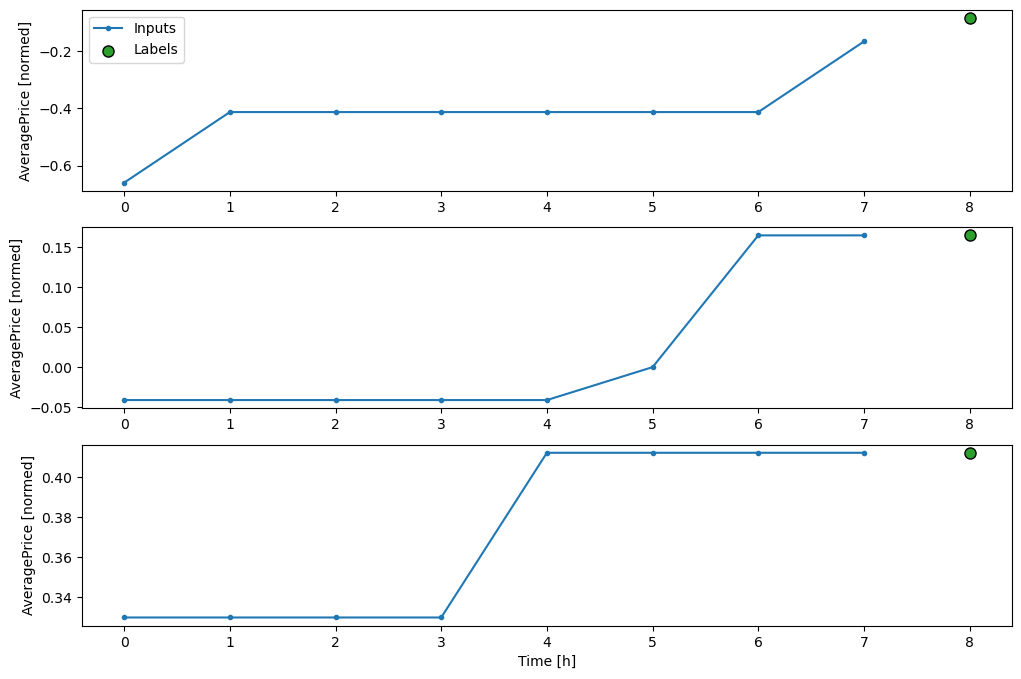

In [32]:
w2.plot()

In [33]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [34]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [35]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 8, 9), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [41]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 8, 9)
Labels shape (batch, time, features): (32, 1, 1)


In [44]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['AveragePrice'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['AveragePrice']

In [45]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 9)
Labels shape (batch, time, features): (32, 1, 1)


In [46]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [48]:
baseline = Baseline(label_index=column_indices['AveragePrice'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

8/8 [==============================] - 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.0612


In [51]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['AveragePrice'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['AveragePrice']

In [52]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 9)
Output shape: (32, 24, 1)


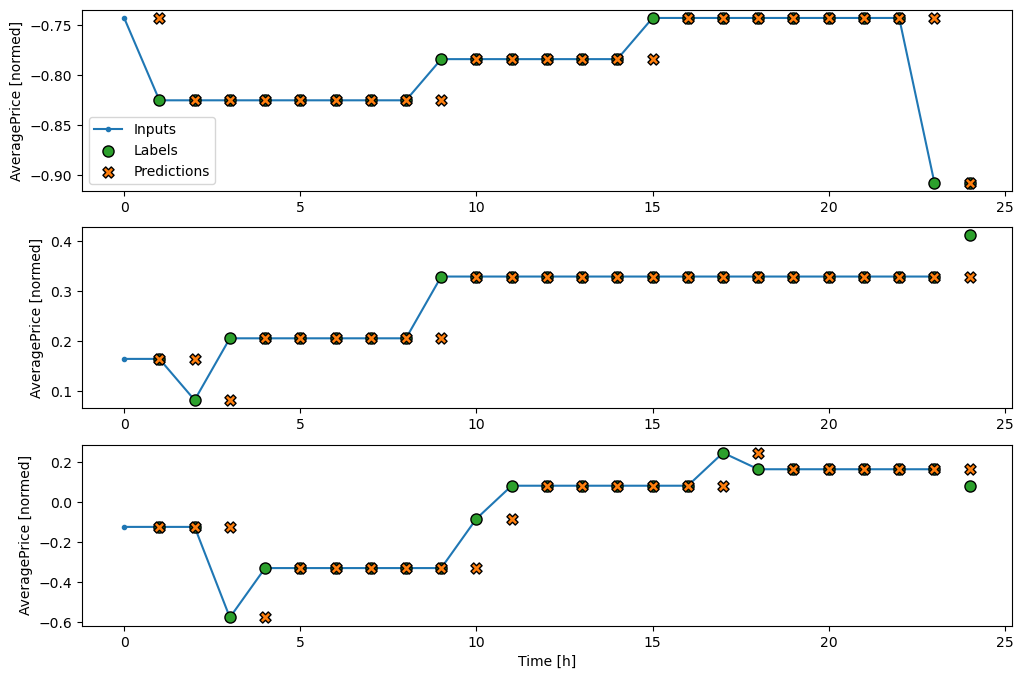

In [53]:
wide_window.plot(baseline)

# Linear Model

In [54]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [55]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 9)
Output shape: (32, 1, 1)


In [56]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [57]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
26/26 [==============================] - 1s 14ms/step - loss: 2.1361 - mean_absolute_error: 1.1197 - val_loss: 13.8115 - val_mean_absolute_error: 3.2518
Epoch 2/20
26/26 [==============================] - 0s 7ms/step - loss: 1.8856 - mean_absolute_error: 1.0551 - val_loss: 12.9402 - val_mean_absolute_error: 3.1700
Epoch 3/20
26/26 [==============================] - 0s 7ms/step - loss: 1.6770 - mean_absolute_error: 0.9970 - val_loss: 12.1097 - val_mean_absolute_error: 3.0854
Epoch 4/20
26/26 [==============================] - 0s 7ms/step - loss: 1.4974 - mean_absolute_error: 0.9466 - val_loss: 11.3116 - val_mean_absolute_error: 2.9931
Epoch 5/20
26/26 [==============================] - 0s 7ms/step - loss: 1.3487 - mean_absolute_error: 0.9048 - val_loss: 10.5357 - val_mean_absolute_error: 2.8974
Epoch 6/20
26/26 [==============================] - 0s 8ms/step - loss: 1.2192 - mean_absolute_error: 0.8663 - val_loss: 9.8985 - val_mean_absolute_error: 2.8170
Epoch 7/20
26/26 [====

In [58]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 9)
Output shape: (32, 24, 1)


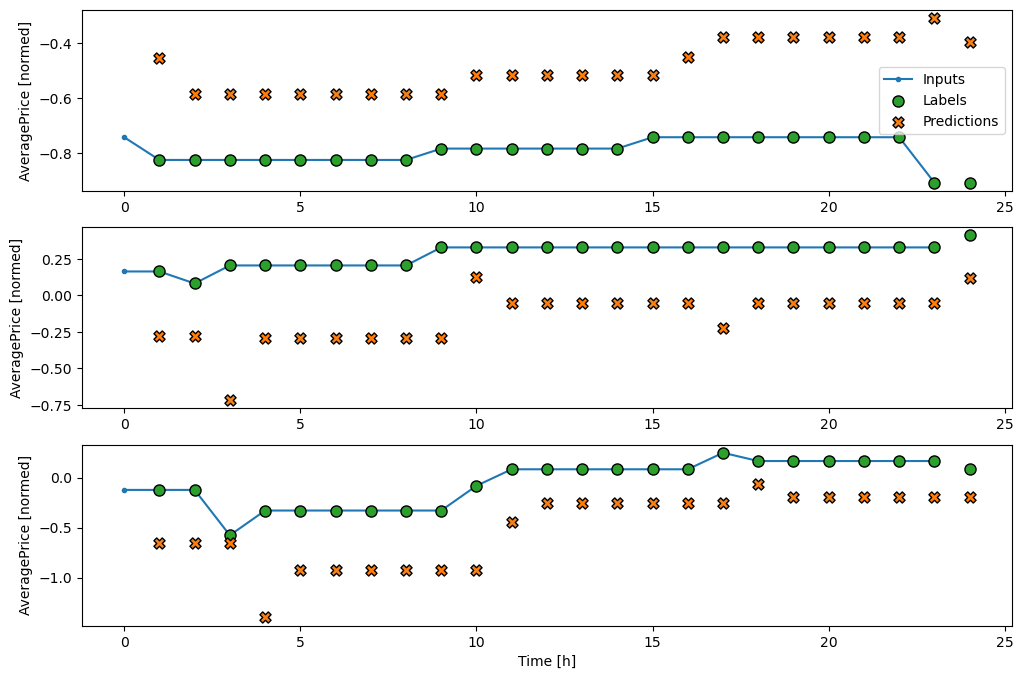

In [59]:
wide_window.plot(linear)

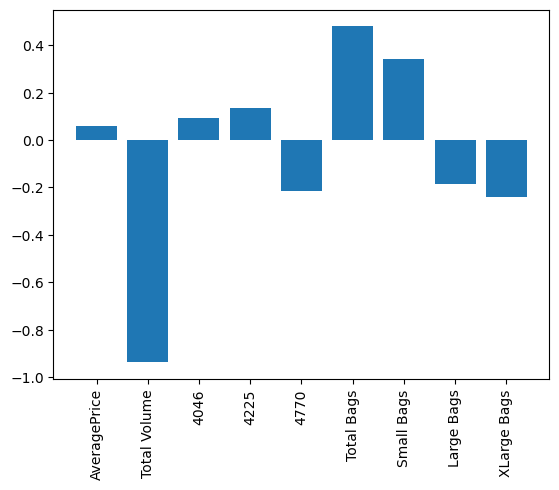

In [60]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

# Dense

In [61]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
26/26 [==============================] - 2s 21ms/step - loss: 0.3115 - mean_absolute_error: 0.3831 - val_loss: 0.4317 - val_mean_absolute_error: 0.5249
Epoch 2/20
26/26 [==============================] - 0s 7ms/step - loss: 0.0699 - mean_absolute_error: 0.1906 - val_loss: 0.3853 - val_mean_absolute_error: 0.5465
Epoch 3/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0335 - mean_absolute_error: 0.1265 - val_loss: 0.1016 - val_mean_absolute_error: 0.2568
Epoch 4/20
26/26 [==============================] - 0s 7ms/step - loss: 0.0238 - mean_absolute_error: 0.1019 - val_loss: 0.0821 - val_mean_absolute_error: 0.2213
Epoch 5/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0937 - val_loss: 0.0556 - val_mean_absolute_error: 0.1689
Epoch 6/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0196 - mean_absolute_error: 0.0882 - val_loss: 0.0545 - val_mean_absolute_error: 0.1646
Epoch 7/20
26/26 [=========

In [62]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['AveragePrice'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['AveragePrice']

Text(0.5, 1.0, 'Given 3 days of inputs, predict 1 day into the future.')

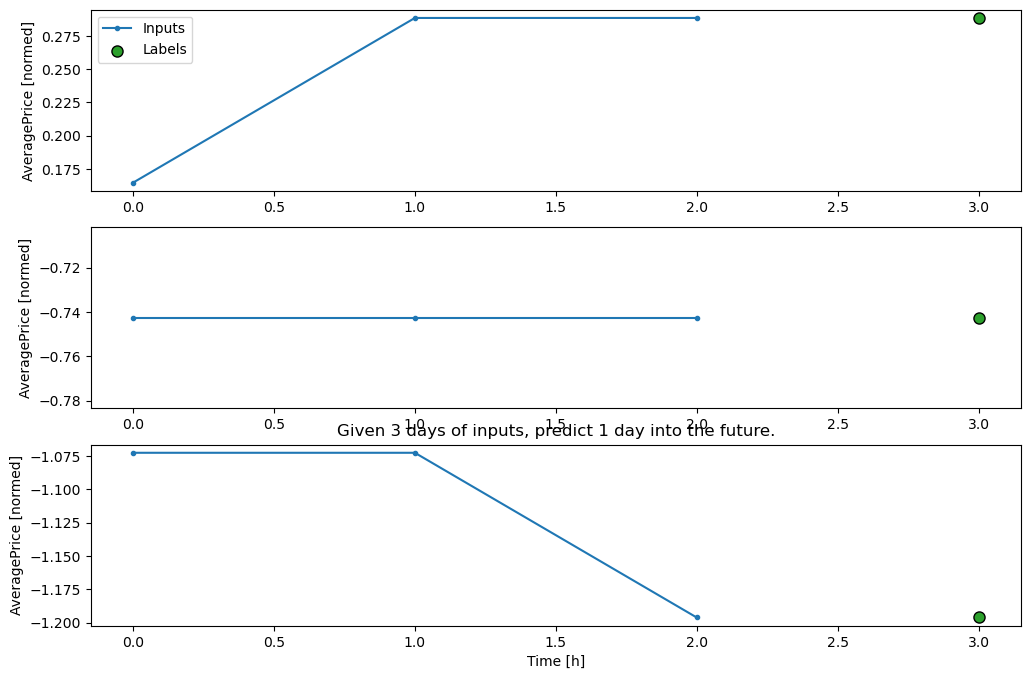

In [65]:
conv_window.plot()
plt.title("Given 3 days of inputs, predict 1 day into the future.")

# Multiple Dense

In [66]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [67]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 9)
Output shape: (32, 1, 1)


In [69]:
history = compile_and_fit(multi_step_dense, conv_window)

# IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

Epoch 1/20
26/26 [==============================] - 1s 16ms/step - loss: 0.0266 - mean_absolute_error: 0.1136 - val_loss: 0.2286 - val_mean_absolute_error: 0.3549
Epoch 2/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.1070 - val_loss: 0.1655 - val_mean_absolute_error: 0.3017
Epoch 3/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.1015 - val_loss: 0.1700 - val_mean_absolute_error: 0.3134
Epoch 4/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.1011 - val_loss: 0.1355 - val_mean_absolute_error: 0.2913
Epoch 5/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0213 - mean_absolute_error: 0.0996 - val_loss: 0.1718 - val_mean_absolute_error: 0.3122
Epoch 6/20
8/8 [==============================] - 0s 2ms/step - loss: 0.1600 - mean_absolute_error: 0.3044


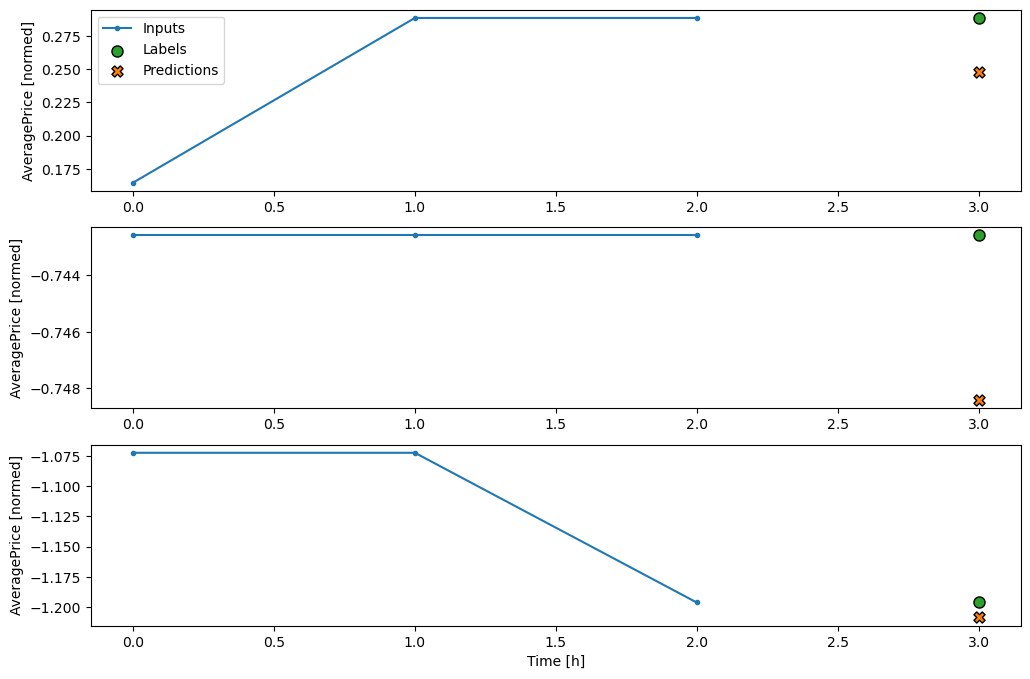

In [70]:
conv_window.plot(multi_step_dense)

In [71]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 9)

ValueError:Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).

Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 27, but received input with shape (32, 216)

Call arguments received by layer "sequential_2" "                 f"(type Sequential):
  • inputs=tf.Tensor(shape=(32, 24, 9), dtype=float32)
  • training=None
  • mask=None


# Convolutional Neural Network

In [72]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [73]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 9)
Output shape: (32, 1, 1)


In [74]:
history = compile_and_fit(conv_model, conv_window)

val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Epoch 1/20
26/26 [==============================] - 3s 46ms/step - loss: 0.2987 - mean_absolute_error: 0.3811 - val_loss: 1.3812 - val_mean_absolute_error: 0.9762
Epoch 2/20
26/26 [==============================] - 0s 12ms/step - loss: 0.0582 - mean_absolute_error: 0.1783 - val_loss: 0.7745 - val_mean_absolute_error: 0.7437
Epoch 3/20
26/26 [==============================] - 1s 33ms/step - loss: 0.0377 - mean_absolute_error: 0.1363 - val_loss: 0.6548 - val_mean_absolute_error: 0.6681
Epoch 4/20
26/26 [==============================] - 1s 31ms/step - loss: 0.0295 - mean_absolute_error: 0.1178 - val_loss: 0.5392 - val_mean_absolute_error: 0.5854
Epoch 5/20
26/26 [==============================] - 1s 28ms/step - loss: 0.0247 - mean_absolute_error: 0.1062 - val_loss: 0.4635 - val_mean_absolute_error: 0.5212
Epoch 6/20
26/26 [==============================] - 1s 33ms/step - loss: 0.0229 - mean_absolute_error: 0.1003 - val_loss: 0.4304 - val_mean_absolute_error: 0.5002
Epoch 7/20
26/26 [====

In [75]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 9)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


# Recurrent Neural Network

In [76]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [77]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 9)
Output shape: (32, 24, 1)


In [78]:
history = compile_and_fit(lstm_model, wide_window)
    
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/20
25/25 [==============================] - 6s 45ms/step - loss: 0.5653 - mean_absolute_error: 0.5521 - val_loss: 3.7334 - val_mean_absolute_error: 1.6628
Epoch 2/20
25/25 [==============================] - 0s 17ms/step - loss: 0.1916 - mean_absolute_error: 0.3059 - val_loss: 2.2406 - val_mean_absolute_error: 1.2153
Epoch 3/20
25/25 [==============================] - 0s 16ms/step - loss: 0.1205 - mean_absolute_error: 0.2373 - val_loss: 1.5941 - val_mean_absolute_error: 1.0189
Epoch 4/20
25/25 [==============================] - 0s 15ms/step - loss: 0.0907 - mean_absolute_error: 0.2013 - val_loss: 1.2529 - val_mean_absolute_error: 0.8975
Epoch 5/20
25/25 [==============================] - 0s 14ms/step - loss: 0.0745 - mean_absolute_error: 0.1797 - val_loss: 1.0395 - val_mean_absolute_error: 0.8105
Epoch 6/20
25/25 [==============================] - 0s 14ms/step - loss: 0.0647 - mean_absolute_error: 0.1651 - val_loss: 0.9010 - val_mean_absolute_error: 0.7438
Epoch 7/20
25/25 [====

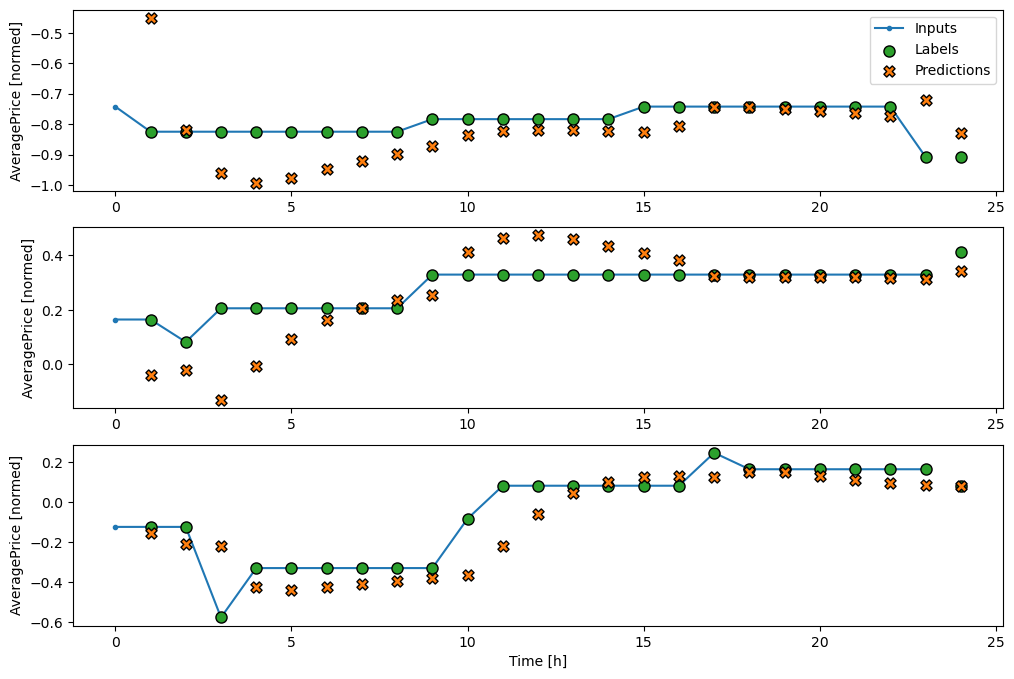

In [79]:
wide_window.plot(lstm_model)

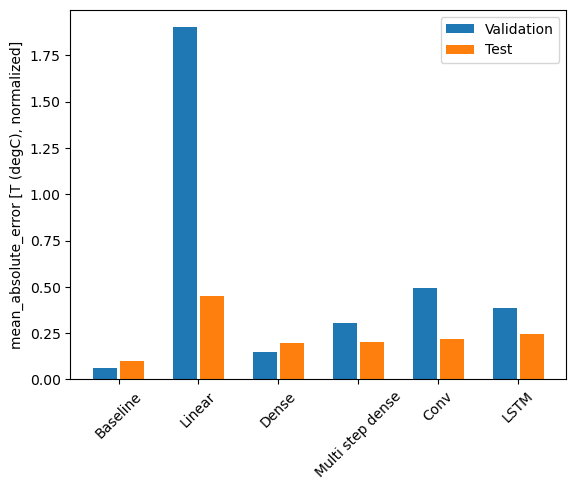

In [80]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()